In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
base_census = pd.read_csv('census.csv')

In [9]:
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
base_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
base_census.isna().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

Visualização dos dados

In [13]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

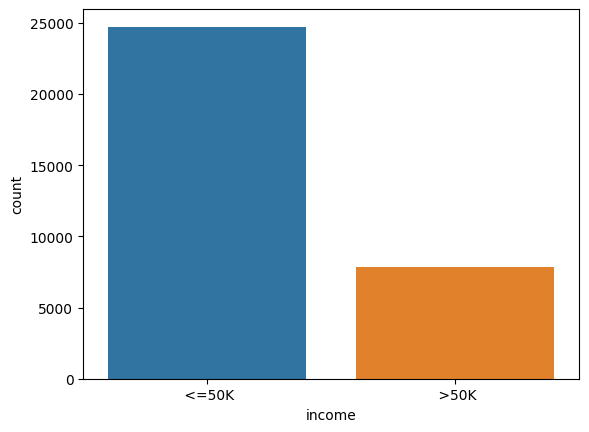

In [17]:
sns.countplot(x=base_census['income']);

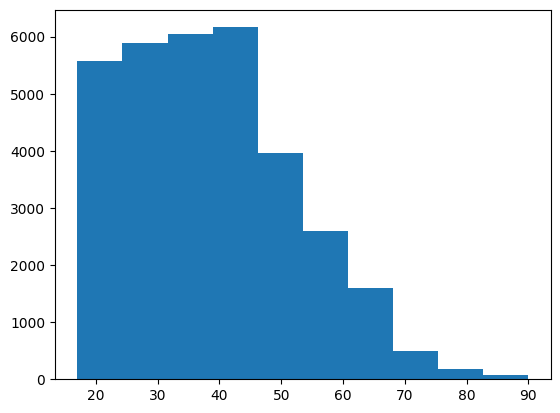

In [16]:
plt.hist(x=base_census['age']);

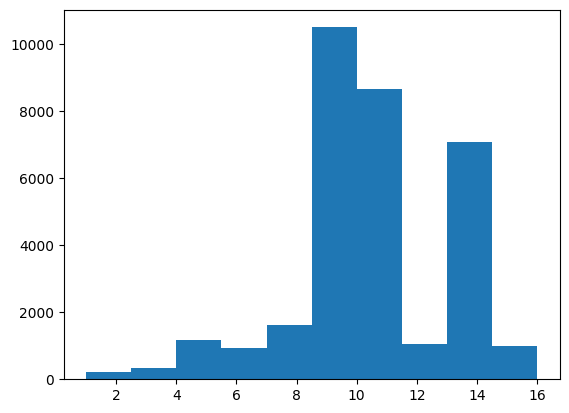

In [18]:
plt.hist(x=base_census['education-num']);

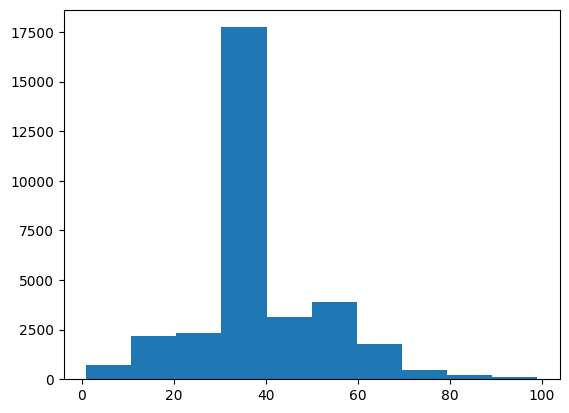

In [19]:
plt.hist(x=base_census['hour-per-week']);

Divisão entre previsores e classe

In [27]:
X_census = base_census.iloc[:, 0:14].values
y_census = base_census.iloc[:, 14].values

Tratamento de atributos categóricos

In [32]:
#Label Encoder

from sklearn.preprocessing import LabelEncoder

In [33]:
labelEncoderWorkclass = LabelEncoder()
labelEncoderEducation = LabelEncoder()
labelEncoderMarital = LabelEncoder()
labelEncoderOccupation = LabelEncoder()
labelEncoderRelationship = LabelEncoder()
labelEncoderRace = LabelEncoder()
labelEncoderSex = LabelEncoder()
labelEncoderCountry = LabelEncoder()

In [34]:
X_census[:, 1] = labelEncoderWorkclass.fit_transform(X_census[:, 1])
X_census[:, 3] = labelEncoderEducation.fit_transform(X_census[:, 3])
X_census[:, 5] = labelEncoderMarital.fit_transform(X_census[:, 5])
X_census[:, 6] = labelEncoderOccupation.fit_transform(X_census[:, 6])
X_census[:, 7] = labelEncoderRelationship.fit_transform(X_census[:, 7])
X_census[:, 8] = labelEncoderRace.fit_transform(X_census[:, 8])
X_census[:, 9] = labelEncoderSex.fit_transform(X_census[:, 9])
X_census[:, 13] = labelEncoderCountry.fit_transform(X_census[:, 13])

In [38]:
# OneHotEconder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
OneHotEncoderCensus = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [40]:
X_census = OneHotEncoderCensus.fit_transform(X_census).toarray()

Escalonamento dos valores

In [44]:
from sklearn.preprocessing import StandardScaler

scalerCensus = StandardScaler()

X_census = scalerCensus.fit_transform(X_census)

Divisão dasa bases em treinamento e teste

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.2, random_state=0)

Salvar as variáveis

In [52]:
import pickle

In [53]:
with open('census.pkl', mode='wb') as f:
    pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)